# EDA

## Task:

Choose a stakeholder who wants to buy or sell a house. Load data about houses in King County. 
Analyze the data for your stakeholder. 

## Chosen stakeholder

The stakeholder for this project is Thomas Hansen. He has 5 children and not much money. He wants to live in a good social environment and is interested if there is a good time to buy a house. 

## Preparations:

In [59]:
# Import everything needed. 
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Load the data in panda framework 

In [60]:
#Load Data from file in data
df = pd.read_csv('data/King_County_House_prices_dataset.csv')

## Use methods to see the descriptive statistics and analyze it

#### 1. Get the first five lines to check if data is in the Dataframe and get a first look at the data. 

In [61]:
df.head(5) 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


#### 2. Categorize in continuous and categorical data check for categories

In [62]:
df['waterfront'].unique() #Get all possible values for the categorical values

array([nan,  0.,  1.])

In [63]:
df['view'].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [64]:
df['condition'].unique()

array([3, 5, 4, 1, 2])

In [65]:
df['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

##### Awareness: 
* ***price***: continuous
* ***bedrooms***: continuous
* ***bathrooms***: continuous
* ***sqft_living***: continuous
* ***sqft_lot***: continuous
* ***floors***: continuous
* ***waterfront***: categorical (0, 1, NaN)
* ***view***: categorical (0 - 4  & NaN)
* ***condition***: categorical (1 - 5)
* ***grade***: categorical (1 - 13)
* ***sqft_above***: continuous
* ***sqft_basement***: continuous
* ***yr_built***: continuous
* ***yr_renovated***: continuous
* ***zipcode***: continuous
* ***lat***: continuous
* ***long***: continuous
* ***sqft_living15***: continuous
* ***sqft_lot15***: continuous

#### 2. Get the size of the Dataframe

In [66]:
original_rows, columns = df.shape
print(original_rows, columns)

21597 21


#### 3. Get the data types and how many non-null values are in the data

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

##### Result: There are a information just null. 
* ***waterfront***: There are 3842 values null.
* ***view***: There are 63 values null. 
* ***yr_renovated***: There are 3842 values null. 

#### 4. Get the mean, number etc. for each column. 

In [68]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19221.000,21534.000,21597.000,21597.000,21597.000,21597.000,17755.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,540296.574,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,1971.000,83.637,98077.952,47.560,-122.214,1986.620,12758.284
std,2876735715.748,367368.140,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,29.375,399.946,53.513,0.139,0.141,685.230,27274.442
min,1000102.000,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049175.000,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930410.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,7308900490.000,645000.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


## Research questions

| Question  |  Hypotheses  | Indicators 
|---------- | -------------|-------------
|How does the ratings affect the price?   | The price increase if the condition is higher.| condition 
|                                         | The price will increase if the grades are higher.| grades
|How does the size of the house affects the price?    | The price will be higher if there are more rooms.  | bedrooms
|                                         | The price will increase if the house has more square footage.| sqft_living
|                                         | The price will increase if the house has a bigger lot| sqft_lot
|Where have the houses a good condition and still low prices? |The price of a house with the same condition will increase if the house is closer to the city center| lat and long + condition 
|How does the time affects the price? | The later the renovation year the higher the price| yr_renovated 
|     | The later the renovation year the higher the price| yr_build
|     |There are better months in year to buy houses. | date
|     |There is a time in the month where it is better to buy a house.|date

## Exploring the data

#### What are the columns are important for the stakeholder?
1. **condition**: A nice social neighborhood is crucial for a family. 
2. **grades**: It might be a possible to save money. 
3. **bedrooms**: For a big family you need many bedrooms. 
4. **sqft_living**: For a big family, you need much living space. 
5. **sqft_lot**: A small basement or no basement is a possibility to save money. 
6. **lat and long**: The location could be a possibility to save money. 
7. **yr_renovated**: It is possible to renovate on your own to save money. 
8. **yr_build**: An older house may be cheaper. 
9. **date**: Maybe there is a better moment to buy a house. (In a season or at the beginning of the month.)
10. **sqft_living15**: The stakeholders want neighbors. 
11. **price**: It is the most important factor for a poor family. 

#### Check the conditions:

Text(0, 0.5, 'Number')

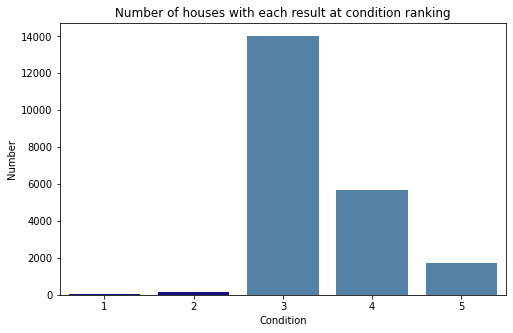

In [69]:
df_count_cond = df.groupby('condition').count().reset_index() #group the data by condition so you can count how many houses of each is in the list
#Count the IDs because it should be the key of the list and therefore each house shall have one
ax_cond = sns.barplot(x='condition', y='id', data= df_count_cond, ci=None, palette = ['darkblue', 'darkblue', 'steelblue', 'steelblue', 'steelblue']) 
plt.title('Number of houses with each result at condition ranking')
plt.xlabel('Condition')
plt.ylabel('Number')

The condition of most houses are marked with 3. There are just a few houses under that mark. 
For a family a nice neighborhood is important. As that I will clean the data of the to worst conditions. 
To find out, if 1 is better or if five is better I compare the mean prices in for condition types. 

In [70]:
print(df[df['condition'] == 5]['price'].mean())
print(df[df['condition'] == 1]['price'].mean())

612577.7425044092
341067.2413793103


The price for the houses where the condition values are lower, the price is also lower. It is likely that it means the higher this value the better is the neighborhood. 

In [71]:
df = df.drop(df[df.condition < 3].index)

#### Check the grades:

Text(0, 0.5, 'Number')

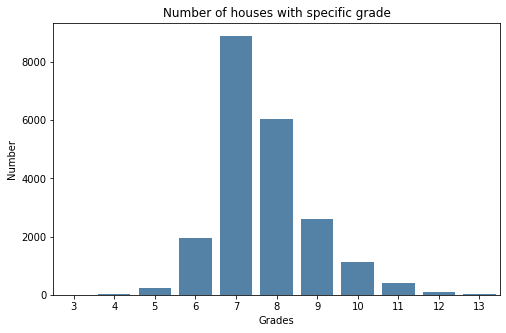

In [72]:
df_count_gra = df.groupby('grade').count().reset_index()
ax_grade = sns.barplot(x='grade', y='id', data= df_count_gra, ci=None, color = 'steelblue')
plt.title('Number of houses with specific grade')
plt.xlabel('Grades')
plt.ylabel('Number')

In [73]:
#Try to decide which grade means better
df_gr_3 = df[df['grade'] == 3] 
df_gr_13 = df[df['grade'] == 13]
print(df_gr_3['yr_built'].mean())
print(df_gr_3[df_gr_3['yr_renovated'] > 0]['yr_renovated'].mean()) #None house with grade 3 has ever been renovated
print(df_gr_13['yr_built'].mean())
print(df_gr_13[df_gr_13['yr_renovated'] > 0]['yr_renovated'].mean())

1920.0
nan
1976.6153846153845
1994.5


It is likely that a newer house or a house which was renovated lately has is graded better as an old house which has never been renovated I calculated the mean of the year, when the house was built oder last renovated and was graded especially high or low. From this I assume 3 is the worse value than 13.
From the plot I do not recognize any outlays I do not work with further. 

#### Check the Bedrooms:

Text(0, 0.5, 'Number')

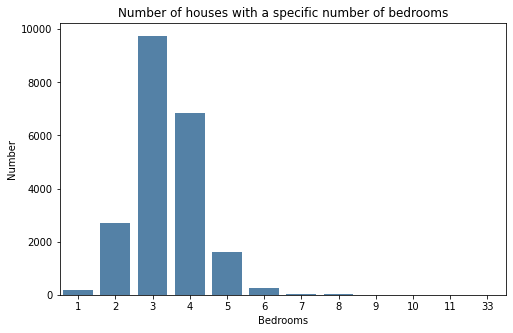

In [74]:
df_count_bed = df.groupby('bedrooms').count().reset_index()
ax_bed= sns.barplot(x='bedrooms', y='id', data= df_count_bed, ci=None, color = 'steelblue')
plt.title('Number of houses with a specific number of bedrooms')
plt.xlabel('Bedrooms') 
plt.ylabel('Number')

For a family with five children it is not possible to live in a house with two bedrooms or less. So I will clean my data of all data with less than 3 bedrooms. 
Furthermore I think a house with 33 bedrooms are not realistic. So I will drop it, too. 

Text(0, 0.5, 'Number')

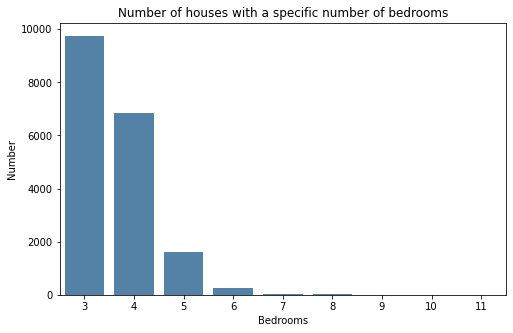

In [75]:
df = df.drop(df[df.bedrooms< 3].index)
df = df.drop(df[df.bedrooms> 30].index)
df_count_bed = df.groupby('bedrooms').count().reset_index()
ax_bed = sns.barplot(x='bedrooms', y='id', data= df_count_bed, ci=None, color = 'steelblue')
plt.title('Number of houses with a specific number of bedrooms')
plt.xlabel('Bedrooms') 
plt.ylabel('Number')

#### Check the footage of the living area

In [76]:
#Build ranges for teh footage. Continous data 
range_footage = np.arange(0, 13540.000, 500)
cut_footage = pd.cut(df['sqft_living'], bins=range_footage)
df_footage = df
df_footage['ranged_footage']=cut_footage

Text(0, 0.5, 'Number')

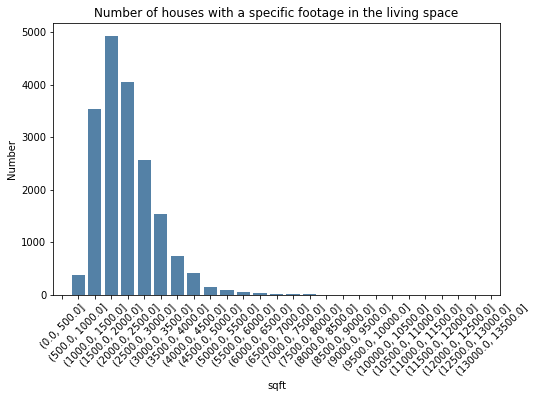

In [77]:
df_footage = df_footage.groupby('ranged_footage').count().reset_index()
ax_foot = sns.barplot(x='ranged_footage', y='id', data= df_footage, ci=None, color = 'steelblue')
plt.xticks(rotation=45)
plt.title('Number of houses with a specific footage in the living space')
plt.xlabel('sqft') 
plt.ylabel('Number')

There are values bigger than 7500 but just a few. But everything seems normal.

In [78]:
df[df['sqft_living'] > 7500]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,ranged_footage
1162,1247600105,10/20/2014,5110000.000,5,5.250,8010,45517,2.000,1.000,4.000,...,5990,2020.0,1999,0.000,98033,47.677,-122.211,3430,26788,"(8000.0, 8500.0]"
1446,8907500070,4/13/2015,5350000.000,5,5.000,8000,23985,2.000,0.000,4.000,...,6720,1280.0,2009,0.000,98004,47.623,-122.220,4600,21750,"(7500.0, 8000.0]"
3910,9808700762,6/11/2014,7060000.000,5,4.500,10040,37325,2.000,1.000,2.000,...,7680,2360.0,1940,2001.000,98004,47.650,-122.214,3930,25449,"(10000.0, 10500.0]"
4407,2470100110,8/4/2014,5570000.000,5,5.750,9200,35069,2.000,0.000,0.000,...,6200,3000.0,2001,NaN,98039,47.629,-122.233,3560,24345,"(9000.0, 9500.0]"
7245,6762700020,10/13/2014,7700000.000,6,8.000,12050,27600,2.500,0.000,3.000,...,8570,3480.0,1910,1987.000,98102,47.630,-122.323,3940,8800,"(12000.0, 12500.0]"
8085,1924059029,6/17/2014,4670000.000,5,6.750,9640,13068,1.000,1.000,4.000,...,4820,4820.0,1983,2009.000,98040,47.557,-122.210,3270,10454,"(9500.0, 10000.0]"
9245,9208900037,9/19/2014,6890000.000,6,7.750,9890,31374,2.000,0.000,4.000,...,8860,1030.0,2001,0.000,98039,47.630,-122.240,4540,42730,"(9500.0, 10000.0]"
12764,1225069038,5/5/2014,2280000.000,7,8.000,13540,307752,3.000,0.000,4.000,...,9410,4130.0,1999,0.000,98053,47.667,-121.986,4850,217800,NaN
13398,2426039123,1/30/2015,2420000.000,5,4.750,7880,24250,2.000,0.000,2.000,...,7880,0.0,1996,0.000,98177,47.733,-122.362,2740,10761,"(7500.0, 8000.0]"
14019,3459900230,11/25/2014,1680000.000,4,3.750,7620,29536,2.000,0.000,3.000,...,5980,1640.0,2005,0.000,98006,47.557,-122.140,2840,20809,"(7500.0, 8000.0]"


#### Check the footage of the lot

Text(0, 0.5, 'Number')

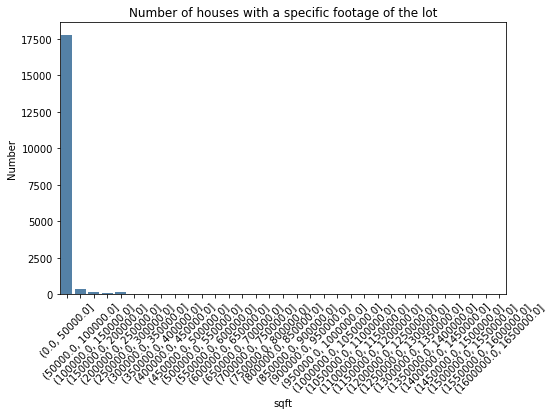

In [79]:
range_footage_lot = np.arange(0, 1651359.000, 50000)
cut_footage_lot = pd.cut(df['sqft_lot'], bins=range_footage_lot)
df_footage_lot = df
df_footage_lot['ranged_footage_lot']=cut_footage_lot
df_footage_lot = df_footage_lot.groupby('ranged_footage_lot').count().reset_index()
ax_foot_lot = sns.barplot(x='ranged_footage_lot', y='id', data= df_footage_lot, ci=None, color = 'steelblue')
plt.xticks(rotation=45)
plt.title('Number of houses with a specific footage of the lot')
plt.xlabel('sqft') 
plt.ylabel('Number')


There are a few outliers with a huge lot. Because our stakeholder do not want a farm but neighbors I drop after 30000.

Text(0, 0.5, 'Number')

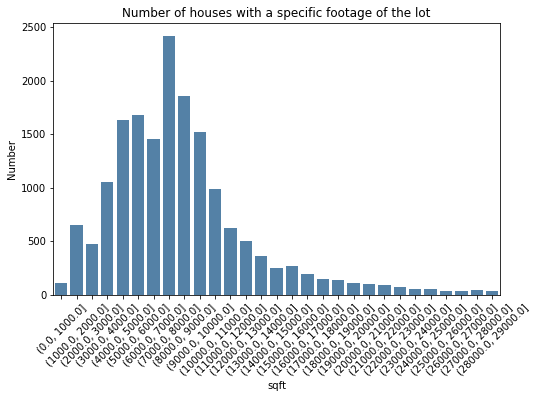

In [80]:
df = df.drop(df[df.sqft_lot> 50000].index)
range_footage_lot = np.arange(0, 30000.000, 1000)
cut_footage_lot = pd.cut(df['sqft_lot'], bins=range_footage_lot)
df_footage_lot = df
df_footage_lot['ranged_footage_lot']=cut_footage_lot
df_footage_lot = df_footage_lot.groupby('ranged_footage_lot').count().reset_index()
ax_foot_lot = sns.barplot(x='ranged_footage_lot', y='id', data= df_footage_lot, ci=None, color = 'steelblue')
plt.xticks(rotation=45)
plt.title('Number of houses with a specific footage of the lot')
plt.xlabel('sqft') 
plt.ylabel('Number')

#### Check for the coordinates

In [81]:
fig = px.scatter_mapbox(data_frame = df, 
                        lat="lat", 
                        lon="long",
                        color='price', 
                        color_continuous_scale=px.colors.sequential.haline_r, 
                        hover_name='grade',
                        size='price',
                        zoom=9,
                        width = 900,
                        height=800)
fig.update_layout(mapbox_style="carto-positron")
#fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()
# "open-street-map", "carto-positron", "carto-darkmatter", "stamen-terrain", "stamen-toner" or "stamen-watercolor"

It looks okay. 

#### Check the building year

Text(0, 0.5, 'Number')

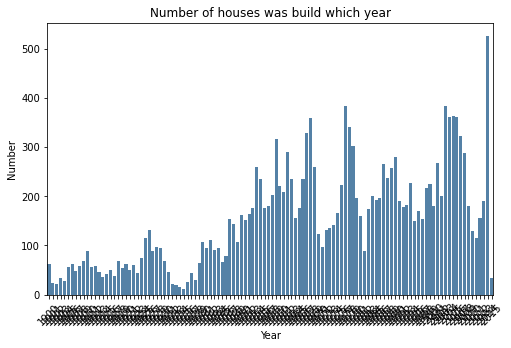

In [82]:
df_count_built = df.groupby('yr_built').count().reset_index()
ax_built= sns.barplot(x='yr_built', y='id', data= df_count_built, ci=None, color = 'steelblue')
plt.title('Number of houses was build which year')
plt.xticks(rotation=45)
plt.xlabel('Year') 
plt.ylabel('Number')


In [83]:
df.groupby('yr_built').count()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,ranged_footage,ranged_footage_lot
yr_built,,,,,,,,,,,,,,,,,,,,,
1900,63,63,63,63,63,63,63,63,55,63,...,63,63,51,63,63,63,63,63,63,62
1901,23,23,23,23,23,23,23,23,22,23,...,23,23,18,23,23,23,23,23,23,23
1902,22,22,22,22,22,22,22,22,19,22,...,22,22,17,22,22,22,22,22,22,22
1903,34,34,34,34,34,34,34,34,29,34,...,34,34,24,34,34,34,34,34,34,32
1904,27,27,27,27,27,27,27,27,26,27,...,27,27,26,27,27,27,27,27,27,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,115,115,115,115,115,115,115,115,103,115,...,115,115,94,115,115,115,115,115,115,115
2012,156,156,156,156,156,156,156,156,132,156,...,156,156,128,156,156,156,156,156,156,155
2013,190,190,190,190,190,190,190,190,175,189,...,190,190,161,190,190,190,190,190,190,188


It seems logical that the first houses were built 1900 in the US. It seems okay. 

(17750, 23)
(3755, 23)


Text(0, 0.5, 'Number')

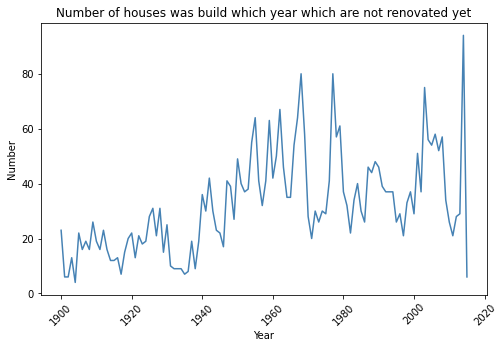

In [84]:
print(df.shape)
df_not_renovated = df.drop(df[df.yr_renovated == 0].index)
print(df_not_renovated.shape)
df_count_bnr = df_not_renovated.groupby('yr_built').count().reset_index()
ax_bnr= sns.lineplot(x='yr_built', y='id', data= df_count_bnr , ci=None, color = 'steelblue')
plt.title('Number of houses was build which year which are not renovated yet')
plt.xticks(rotation=45)
plt.xlabel('Year') 
plt.ylabel('Number')


#### Check the renovation year

Text(0, 0.5, 'Number')

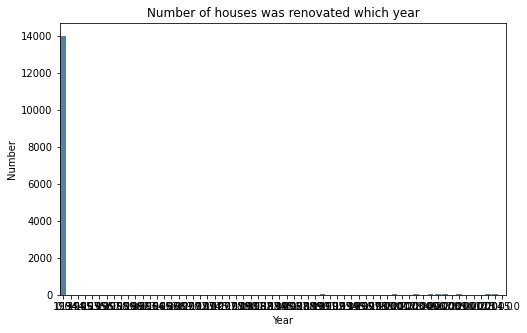

In [85]:
df_count_ren = df.groupby('yr_renovated').count().reset_index()
ax_bed= sns.barplot(x='yr_renovated', y='id', data= df_count_ren, ci=None, color = 'steelblue')
plt.title('Number of houses was renovated which year')
plt.xlabel('Year') 
plt.ylabel('Number')

Many houses never been renovated before. So I create a new dataset just with the already renovated houses to see something. 

Text(0, 0.5, 'Number')

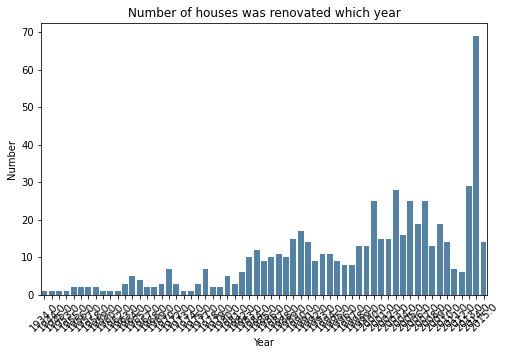

In [86]:
df_renovated = df.drop(df[df.yr_renovated < 1].index)

df_count_ren = df_renovated.groupby('yr_renovated').count().reset_index()
ax_bed= sns.barplot(x='yr_renovated', y='id', data= df_count_ren, ci=None, color = 'steelblue')
plt.title('Number of houses was renovated which year')
plt.xticks(rotation=45)
plt.xlabel('Year') 
plt.ylabel('Number')


That looks okay for me. 

#### Check the date when it last was sold

I do not need the date, I want the seasonality. That means I need the data cut into the day of the month on one hand and on the other hand I need the data cut into the month itself. 

##### Month

Text(0, 0.5, 'Number')

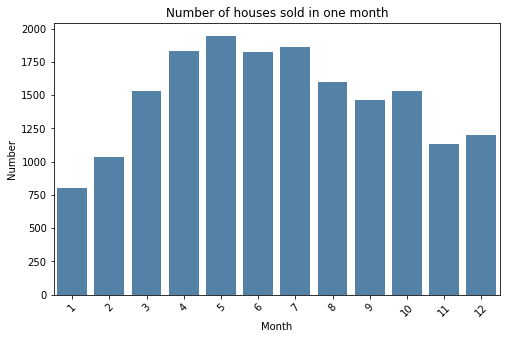

In [87]:
df['buying_month'] = pd.to_datetime(df['date']).dt.month

df_month = df.groupby('buying_month').count().reset_index()
ax_foot_lot = sns.barplot(x='buying_month', y='id', data= df_month, ci=None, color = 'steelblue')
plt.xticks(rotation=45)
plt.title('Number of houses sold in one month')
plt.xlabel('Month') 
plt.ylabel('Number')

Looks okay. More houses are sold in spring and summer than in winter.

##### Day

Text(0, 0.5, 'Number')

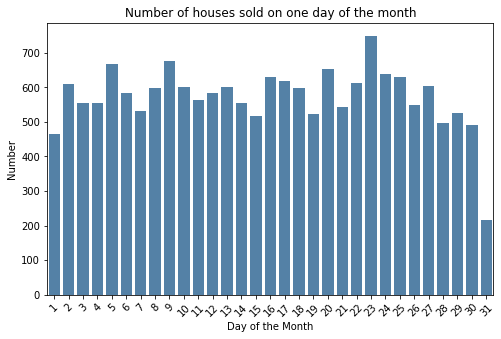

In [88]:
df['buying_day'] =pd.to_datetime(df['date']).dt.day

df_day = df.groupby('buying_day').count().reset_index()
ax_foot_lot = sns.barplot(x='buying_day', y='id', data= df_day, ci=None, color = 'steelblue')
plt.xticks(rotation=45)
plt.title('Number of houses sold on one day of the month')
plt.xlabel('Day of the Month') 
plt.ylabel('Number')

I think the steps are too small to find anything in here. So I make them to quarter of a month. 

Text(0, 0.5, 'Number')

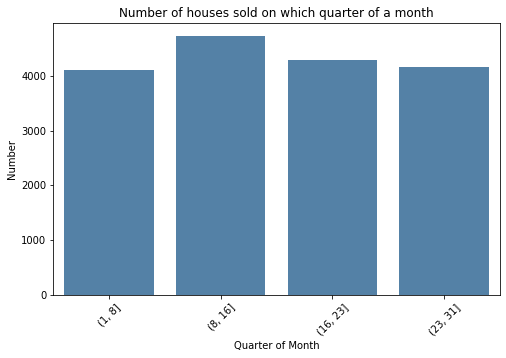

In [89]:
quarter_month = [1, 8, 16, 23, 31]
df['buying_day_quarter'] = pd.cut(df['buying_day'], bins= quarter_month)

df_quarter = df.groupby('buying_day_quarter').count().reset_index()
ax_foot_lot = sns.barplot(x='buying_day_quarter', y='id', data= df_quarter, ci=None, color = 'steelblue')
plt.xticks(rotation=45)
plt.title('Number of houses sold on which quarter of a month')
plt.xlabel('Quarter of Month') 
plt.ylabel('Number')

I needed to make one quarter smaller than the other. Because the last one contains the days that can vary I decide for the second las one. 

#### Check how far away the neighbors are living

Text(0, 0.5, 'Number')

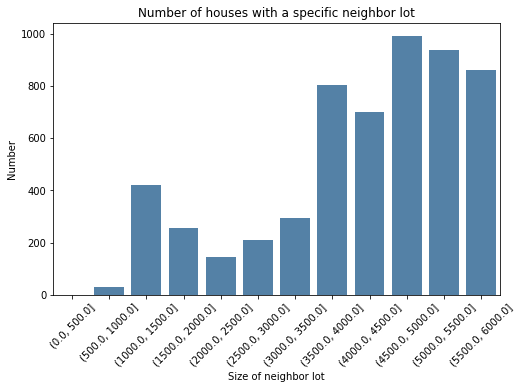

In [90]:
range_neighbors = np.arange(0, 6210.000, 500)
cut_neighbors = pd.cut(df['sqft_lot15'], bins=range_neighbors)
df_neighbors = df
df_neighbors['lot_neighbors']=cut_neighbors
df_neighbors= df_neighbors.groupby('lot_neighbors').count().reset_index()

ax_bed= sns.barplot(x='lot_neighbors', y='id', data= df_neighbors, ci=None, color = 'steelblue')
plt.title('Number of houses with a specific neighbor lot')
plt.xticks(rotation=45)
plt.xlabel('Size of neighbor lot') 
plt.ylabel('Number')

The lots are still okay and many houses has neighbors with big lots. I won't change the data for that. 

#### Check the price

Text(0, 0.5, 'Number')

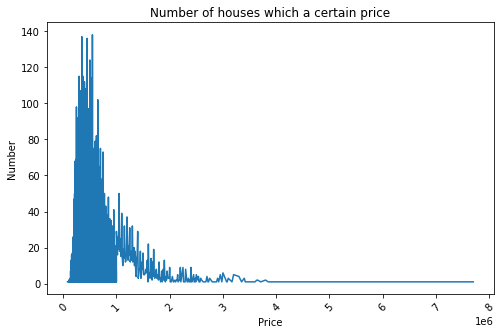

In [91]:
df_count_price = df.groupby('price').count().reset_index()
ax_price = sns.lineplot(data=df_count_price, x='price', y='id', palette='steelblue')
plt.title('Number of houses which a certain price')
plt.xticks(rotation=45)
plt.xlabel('Price') 
plt.ylabel('Number')

Because the stakeholder do not have much money. I will drop the expensive outlier. 

Text(0, 0.5, 'Number')

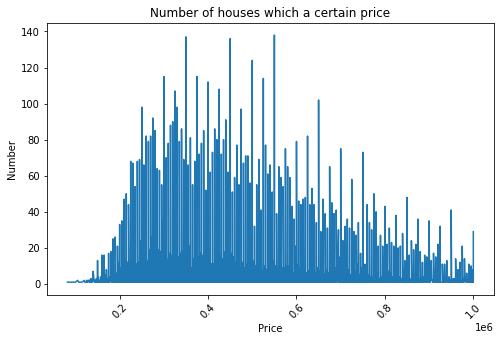

In [92]:
df= df.drop(df[df.price > 1000000].index)

df_count_price = df.groupby('price').count().reset_index()
ax_price = sns.lineplot(data=df_count_price, x='price', y='id', palette='steelblue')
plt.title('Number of houses which a certain price')
plt.xticks(rotation=45)
plt.xlabel('Price') 
plt.ylabel('Number')

With this the data should be usable. 

#### How much data is left?

In [93]:
left_rows, columns = df.shape

print (left_rows)

left_rows/original_rows 

16419


0.7602444783997777

I have still appr. 76% of my data. It is 16419 lines of data. It should be enough. 

## Check the hypothesis

#### The price increase if the condition is higher.

Text(0, 0.5, 'Price')

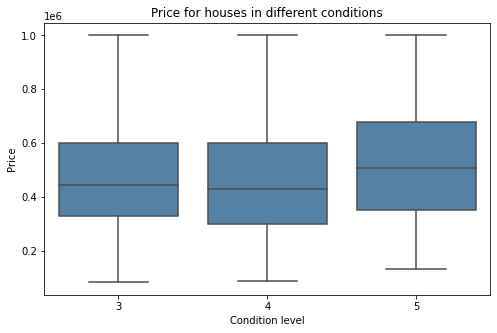

In [94]:
ax_cond_price = sns.boxplot(x="condition", y= "price", data=df, color='steelblue')
plt.title('Price for houses in different conditions')
plt.xlabel('Condition level') 
plt.ylabel('Price')

It doesn't make any difference if you buy a house with condition 3 or 4 in price. 

#### The price will increase if the grades are higher.

Text(0, 0.5, 'Price')

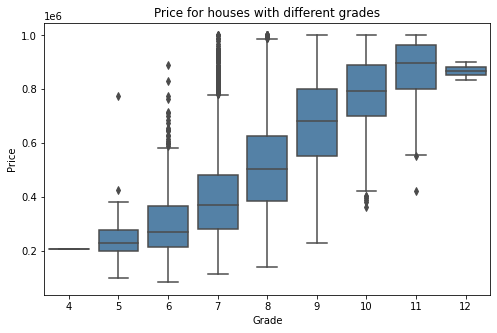

In [95]:

ax_cond_price = sns.boxplot(x="grade", y= "price", data=df, color='steelblue')
plt.title('Price for houses with different grades')
plt.xlabel('Grade') 
plt.ylabel('Price')

It is true, that the price is higher if the grade is higher. 

#### The price will be higher if there are more rooms.

Text(0, 0.5, 'Price')

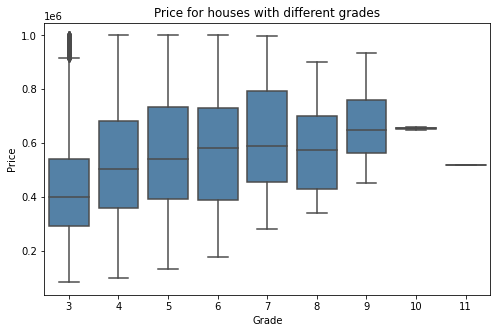

In [96]:
ax_cond_price = sns.boxplot(x="bedrooms", y= "price", data=df, color='steelblue')
plt.title('Price for houses with different grades')
plt.xlabel('Grade') 
plt.ylabel('Price')

#### The price will increase if the house has more square footage.

Text(0, 0.5, 'Price')

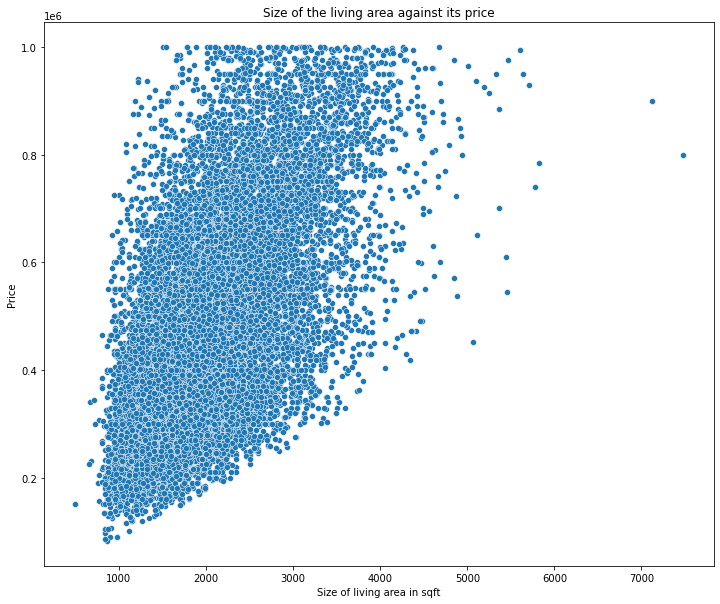

In [97]:

fig, ax = plt.subplots(figsize=(12, 10))
sns.scatterplot(data=df, x="sqft_living", y="price")
plt.title('Size of the living area against its price')
plt.xlabel('Size of living area in sqft') 
plt.ylabel('Price')

The hypothesis seems correctly. 

#### The price will increase if the house has a bigger lot

Text(0, 0.5, 'Price')

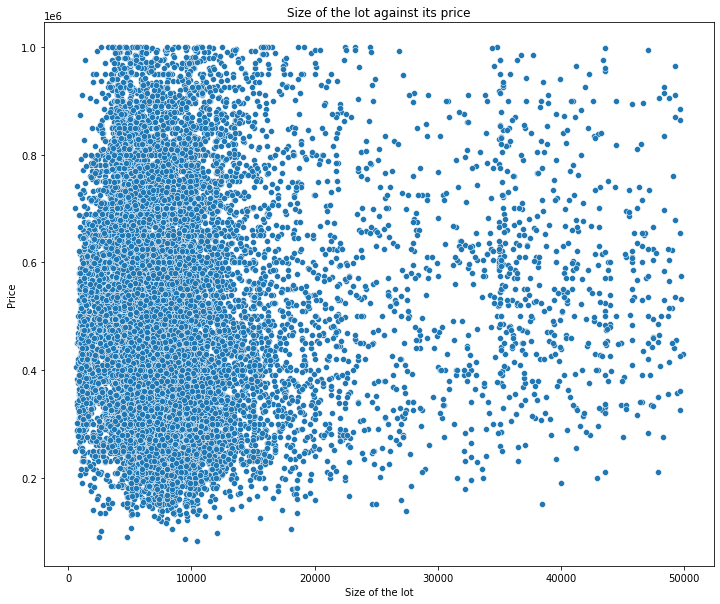

In [98]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.scatterplot(data=df, x="sqft_lot", y="price")
plt.title('Size of the lot against its price')
plt.xlabel('Size of the lot') 
plt.ylabel('Price')

The size of the lot does not have a big impact of the price. 

#### The price of a house with the same condition will increase if the house is closer to the city center

In [99]:
fig = px.scatter_mapbox(data_frame = df, 
                        lat="lat", 
                        lon="long",
                        color='price', 
                        color_continuous_scale=px.colors.sequential.haline_r,
                        zoom=9,
                        width =900,
                        height=800,
                        title= 'Prices and location of the houses' )
fig.update_layout(mapbox_style="carto-positron")
#fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()
# "open-street-map", "carto-positron", "carto-darkmatter", "stamen-terrain", "stamen-toner" or "stamen-watercolor"

The hypothesis is false. It is more like houses in the north are more expensive than in the south. 

#### The later the building year the higher the price

Text(0, 0.5, 'Mean of prices')

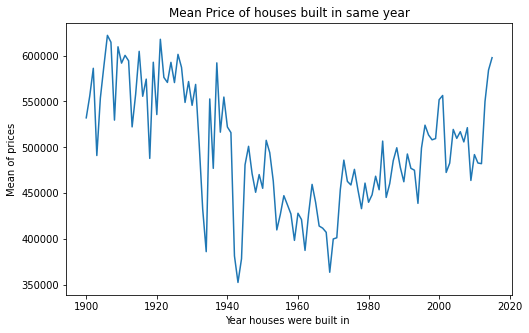

In [100]:
built_mean = df.groupby("yr_built").mean()
df_built_mean= pd.DataFrame(built_mean['price'])
ax_price = sns.lineplot(data=df_built_mean, x='yr_built', y='price', palette='steelblue')
plt.title('Mean Price of houses built in same year')
plt.xlabel('Year houses were built in ') 
plt.ylabel('Mean of prices')

Hypothesis is not correct. The cheapest houses are built between the 60s and the 80s. 
There are two outlier years earlier. 

In [101]:
min_year = df_built_mean[df_built_mean['price'] == df_built_mean.min()['price']]
print(min_year.index[0])
print(df[df['yr_built'] == min_year.index[0]].shape)

print(df[df['yr_built'] == min_year.index[0]-1].shape)
print(df[df['yr_built'] == min_year.index[0]-2].shape)

print(df[df['yr_built'] == min_year.index[0]+1].shape)
print(df[df['yr_built'] == min_year.index[0]+2].shape)


1943
(90, 27)
(109, 27)
(84, 27)
(94, 27)
(64, 27)


The outlier in year 1943 cannot be explained by sample size of this year. Maybe it is because of the second world war. 

#### The later the renovation year the higher the price

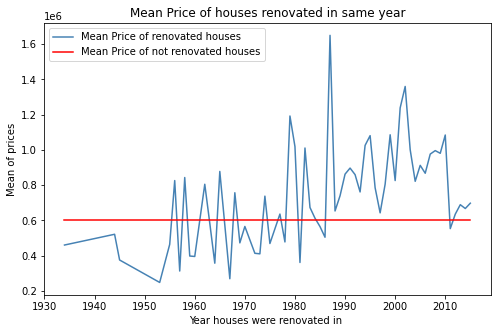

In [102]:
renovated_mean = df_renovated.groupby("yr_renovated").mean()
df_renovated_mean= pd.DataFrame(renovated_mean['price'])
ax_price = sns.lineplot(data=df_renovated_mean, x='yr_renovated', y='price', color='steelblue')

df_mean_nr = pd.DataFrame()
df_mean_nr['year'] = df_renovated_mean.reset_index()['yr_renovated']
df_mean_nr['price_mean']= df_not_renovated.mean()['price']

ax_price = sns.lineplot(data=df_mean_nr, x='year', y='price_mean', color='red')
plt.title('Mean Price of houses renovated in same year')
plt.xlabel('Year houses were renovated in ') 
plt.ylabel('Mean of prices')
plt.legend(labels = ['Mean Price of renovated houses', 'Mean Price of not renovated houses'])

The hypothesis is correct until a certain point. Houses renovation after the 90's don't change the price much. 

#### There are better months in year to buy houses. 

Text(0, 0.5, 'Price')

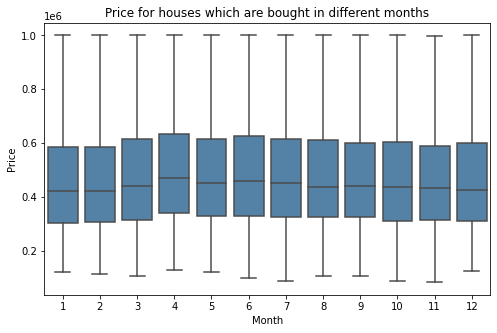

In [103]:
ax_cond_price = sns.boxplot(x='buying_month', y= "price", data=df, color='steelblue')
plt.title('Price for houses which are bought in different months')
plt.xlabel('Month') 
plt.ylabel('Price')

There is no big difference in the house prices in the several months. So the hypothesis is incorrect. 

#### There is a time in the month where it is better to buy a house.

Text(0, 0.5, 'Price')

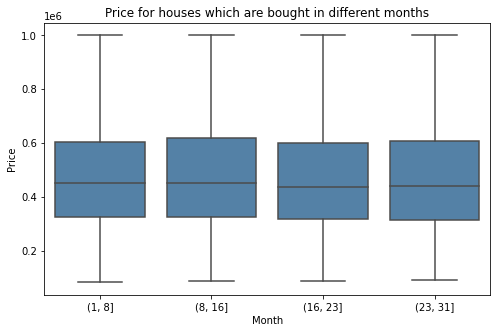

In [104]:
ax_cond_price = sns.boxplot(x='buying_day_quarter', y= "price", data=df, color='steelblue')
plt.title('Price for houses which are bought in different months')
plt.xlabel('Month') 
plt.ylabel('Price')

This hypothesis is incorrect. 

## Result of the analysis 
The hypothesis from the beginning can be summarized in four different interesting hypothesis:
1. A smaller house is cheaper. 
2. The higher the rankings for conditions and grades are, the higher is the price for the house. 
3. The price of a house will increase if the house is closer to the city center.
4. The date matters, when you buy a house.

The first hypothesis is not the best criteria to choose a house for because Thomas Hansen has a big family and need a big house. But ist is shown that the hypothesis is true.\\
The second hypothesis is partly true. Before the analysis the data were cleaned so only houses with conditions between 3 and 5 are left, because it is used as an indicator of a good neighborhood. The stakeholder wants that. The house prices for houses with condition 3 and 4 are similar to each other. Houses with condition 5 are a bit higher. \\
For the grades dependency to house prices could be shown. \\
The third hypothesis is incorrect. There is no obvious differences between the prices of houses near and far from the city center. \\
Teh Fourth hypothesis is not correct. There is no dependency between the date you buy a house and its price.\\
\\
For the stakeholder it would be best to choose house grades with condition 4, with a smallest aceptable grade and in the south of King county which was built around 1942 or in the 70s.
